In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display

This is a test circuit to try and calibrate the arudino analog input with a smoother emitter follower voltage buffer.  The circuit has two 10K resistors and a 4.7 microFarad capacitors.

In [96]:
dp1 = pd.read_csv('datasets/bc547-1k-common-emitter-2.csv', names=['p3', 'a0', 'a1', 'a2'])


In [97]:
dp1.head()

p3   a0   a1    a2
0   0  119  102  1023
1   1  117  101  1023
2   2  117  102  1023
3   3  118  101  1023
4   4  116  101  1023

In [98]:
dp1['Vin'] = dp1.p3 * 5 / 255
dp1['Va0'] = dp1.a0 * 5 / 1023
dp1['Va1'] = dp1.a1 * 5 / 1023
dp1['Va2'] = dp1.a2 * 5 / 1023

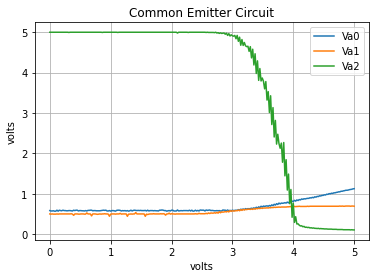

In [99]:
fig, ax = plt.subplots()
ax.plot(dp1.Vin, dp1.Va0, label='Va0')
ax.plot(dp1.Vin, dp1.Va1, label='Va1')
ax.plot(dp1.Vin, dp1.Va2, label='Va2')

ax.grid()
plt.xlabel("volts")
plt.ylabel("volts")
plt.legend()
plt.title("Common Emitter Circuit")
plt.show()

In [100]:
dp2 = dp1[dp1['Vin']> 2.5].copy()
dp2.head()

p3   a0   a1    a2       Vin       Va0       Va1       Va2
128  128  121  103  1023  2.509804  0.591398  0.503421  5.000000
129  129  121  103  1023  2.529412  0.591398  0.503421  5.000000
130  130  117  103  1023  2.549020  0.571848  0.503421  5.000000
131  131  122  105  1022  2.568627  0.596285  0.513196  4.995112
132  132  120  103  1023  2.588235  0.586510  0.503421  5.000000

In [101]:
dp2['Ib'] =  (dp2['Va0'] - dp2['Va1']) / 10  # in milliamps
dp2['Ic'] = (5 - dp2['Va2'])  # 1k resitor converted to milliamps

In [104]:
dp3 = dp2[(dp2.Ic < 4.5) & (dp2.Ic > 0.4) ].copy()

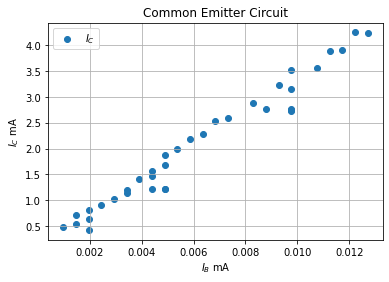

In [105]:
fig, ax = plt.subplots()
ax.scatter(dp3.Ib, dp3.Ic, label='$I_C$')

ax.grid()
plt.xlabel("$I_B$ mA")
plt.ylabel("$I_C$ mA")
plt.legend()
plt.title("Common Emitter Circuit")
plt.show()

In [121]:
# See https://stackoverflow.com/questions/9990789/how-to-force-zero-interception-in-linear-regression on
# how this least squares cell works
x = dp3.Ib.to_numpy()
x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, dp3.Ic, rcond=None)
display("Gain is {}".format(a))

'Gain is [330.53037231]'

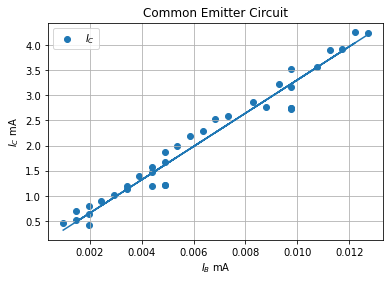

In [117]:
fig, ax = plt.subplots()
ax.scatter(dp3.Ib, dp3.Ic, label='$I_C$')
ax.plot(dp3.Ib, dp3.Ib*a)
ax.grid()
plt.xlabel("$I_B$ mA")
plt.ylabel("$I_C$ mA")
plt.legend()
plt.title("Common Emitter Circuit")
plt.show()